# RENTABILIDAD Y VOLATILIDAD DE UNA CARTERA

## Rentabilidad de una cartera 

Disponemos de $n$ activos tipificados por una rentabilidad media y media $mu_i$ y un nivel de volatilidad $\sigma_i$. Vamos a crear una cartera en la que invertimos una porporción $w_i$ de cada activo. Lógicamente $\sum_i^n w_i=1$.

La rentabilidad esperada de la cartera $\phi$ será:

$$E(\phi)=\mu(\phi)=\sum_i^n w_i·\mu_i$$

Si $\mu$ es el vector de rectabilidades esperadas: $\mu=\left(\begin{array}{clr} \mu_1 \\ \mu_2 \\ ... \\ \mu_n \end{array}\right)$ 

Si $w$ es el vector de ponderaciones de la carter $\phi$: $w=\left(\begin{array}{clr} w_1 \\ w_2 \\ ... \\ w_n \end{array}\right)$

La rentabilidad puede estimarse

$$\begin{align}
\mu(\phi) &= w^T \times \mu \\ 
&=\left(\begin{array}{clr} w_1 & w_2 & ... & w_n \end{array}\right)\left(\begin{array}{clr} \mu_1 \\ \mu_2 \\ ... \\ \mu_n \end{array}\right)
\end{align}$$

## Volatilidad de una cartera 

### 2 activos

Disponemos de dos activos $a=(\mu_a,\sigma_a)$ y $b=(\mu_b,\sigma_b)$, invertimos $w$ en el activo $a$ y $1-w$ en el activo b. La covarianza entre ambos activos es $\sigma_ab$.

La varianza de la cartera $\phi$ será:

$$\sigma^2(\phi)=w^2·\sigma_a^2+(1-w)^2·\sigma_b^2+ 2·w_a·w_b·\sigma_ab $$

La volatilidad será: 

$$\sigma(\phi)=\sqrt{\sigma^2 (\phi)}$$

### n activos

Disponemos de $n$ activos tipificados por una rentabilidad media y media $mu_i$ y un nivel de volatilidad $\sigma_i$. Vamos a crear una cartera en la que invertimos una porporción $w_i$ de cada activo. Lógicamente $\sum_i^n w_i=1$.

La varianza de la cartera $\phi$ será:

$$\sigma^2(\phi)=\sum_{i=1}^n\sum_{j=1}^n w_i·w_j·\sigma_ij $$

Si $S$ representa la matriz de varianzas covarianzas: 

$$S=\left(\begin{array}{clr} 
\sigma^2_1 & \sigma_{12} & ... & \sigma_{1n}  \\
 \sigma_{21} & \sigma^2_2 & ... & \sigma_{2n} \\
 ... & ... & ... & ... \\
 \sigma_{n1} & \sigma_{n2} & ... & \sigma^2_n \\
 
 \end{array}\right)$$

La varianza de la cartera $\phi$ será:
$$\begin{align}
\sigma^2(\phi) &=w^T \times S \times w \\
=& \left(\begin{array}{clr} w_1 & w_2 & ... & w_n \end{array}\right) 
\left(\begin{array}{clr} 
\sigma^2_1 & \sigma_{12} & ... & \sigma_{1n}  \\
 \sigma_{21} & \sigma^2_2 & ... & \sigma_{2n} \\
 ... & ... & ... & ... \\
 \sigma_{n1} & \sigma_{n2} & ... & \sigma^2_n \\
 \end{array}\right)
 \left(\begin{array}{clr} w_1 \\ w_2 \\ ... \\ w_n \end{array}\right)
 \end{align}$$


Instalamos yfinance para poder sacar datos directamente de la página web

In [1]:
pip install yfinance

  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gnews 0.2.7 requires beautifulsoup4~=4.9.3, but you have beautifulsoup4 4.12.2 which is incompatible.
openbb 2.3.1 requires charset-normalizer==2.1.1, but you have charset-normalizer 2.0.12 which is incompatible.
openbb 2.3.1 requires dnspython<3.0.0,>=2.1.0, but you have dnspython 1.16.0 which is incompatible.
openbb 2.3.1 requires fredapi<0.5.0,>=0.4.3, but you have fredapi 0.5.0 which is incompatible.
openbb 2.3.1 requires ipympl<0.9.0,>=0.8.2, but you have ipympl 0.9.2 which is incompatible.
openbb 2.3.1 requires numpy==1.23.4, but you have numpy 1.21.6 which is incom

In [2]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.


Importamos las librerias

Numpy: es una librería para el cálculo numérico.
- Pandas: es una librería para el manejo de los datos
- sklearn : es una librería espectacular para implementar los algoritmos de Machine Learning
- math: es una librería de operadores matemáticos
- matplotlib: es una librería para representaciones gráficas
- scipy.optimize: nos proporciona funciones para optimizar

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Creamos una cartera con dos activos
Descargamos los datos de  Yahoo! Finance

In [2]:
stocks_list = 'AAPL K'  # tickers separados por espacios
start_date = '2009-01-01'
end_date = '2019-01-01'

In [3]:
# Obtenemos los datos
data = yf.download(tickers=stocks_list, start=start_date,
                   end=end_date, interval="1mo")['Adj Close'].dropna()
print("Stocks Prices:")
data.head()

[*********************100%***********************]  2 of 2 completed
Stocks Prices:


,AAPL,K
Date,,
2009-01-01,2.732216,24.645245
2009-02-01,2.707357,21.954527
2009-03-01,3.186625,20.857864
2009-04-01,3.814432,23.978277
2009-05-01,4.116966,24.627411


### Estadísticas descriptivas

In [4]:
# Calculadmos la rentabilidad mensual
monthly_ret = np.log(data).diff().dropna()
print("Rentabilidad mensual:")
print(monthly_ret.head())

Rentabilidad mensual:
                AAPL         K
Date                          
2009-02-01 -0.009140 -0.115611
2009-03-01  0.162990 -0.051242
2009-04-01  0.179829  0.139417
2009-05-01  0.076325  0.026712
2009-06-01  0.047594  0.082371


In [5]:
# Rentabilidad medida
mean_ret = monthly_ret.mean()
print("Rentabilidad media:")
print(mean_ret)

Rentabilidad media:
AAPL    0.022099
K       0.004978
dtype: float64


In [6]:
# Sigma
sigma = monthly_ret.std()
print("Desviación típica:")
print(sigma)

Desviación típica:
AAPL    0.074039
K       0.045404
dtype: float64


In [7]:
# Matrix de varianza covarianza
cov_mat = monthly_ret.cov()
print("Variance-Covariance Matrix:")
print(cov_mat)

Variance-Covariance Matrix:
          AAPL         K
AAPL  0.005482  0.000826
K     0.000826  0.002061


In [8]:
# Matriz de correlaciones
corr_mat = monthly_ret.corr()
print("Correlation Matrix")
print(corr_mat)

Correlation Matrix
          AAPL         K
AAPL  1.000000  0.245718
K     0.245718  1.000000


### Construimos una cartera

In [9]:
# Set proportions
Xa = 0.5
Xb = 1 - Xa
proportions = pd.DataFrame(data = [[Xa], [Xb]],columns = ['Weights'], index = ['AAPL','K']).transpose()
print(proportions)

         AAPL    K
Weights   0.5  0.5


In [10]:
t_monthly_ret = monthly_ret.transpose()
t_monthly_ret.head()

Date,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
AAPL,-0.009140,0.162990,0.179829,0.076325,0.047594,0.137289,0.029074,0.097033,0.016852,0.058769,...,-0.055735,-0.015134,0.122893,-0.005614,0.027598,0.179172,-0.004837,-0.030952,-0.203396,-0.120605
K,-0.115611,-0.051242,0.139417,0.026712,0.082371,0.019773,-0.008669,0.052984,0.045855,0.019977,...,-0.018139,-0.090068,0.089117,0.090434,0.016466,0.010643,-0.016617,-0.067036,-0.028345,-0.100699


In [11]:
# Portfolio Returns
t_monthly_ret = monthly_ret.transpose()
port_ret = proportions.dot(t_monthly_ret).transpose()
port_ret.columns = ['Portfolio Returns']
print(port_ret.head())

            Portfolio Returns
Date                         
2009-02-01          -0.062375
2009-03-01           0.055874
2009-04-01           0.159623
2009-05-01           0.051518
2009-06-01           0.064982


In [12]:
# Calculate portfolio Variance
port_var = proportions.dot(cov_mat).dot(proportions.transpose()).iloc[0,0]
print(pd.Series(port_var,index=["Portfolio Variance"]))

Portfolio Variance    0.002299
dtype: float64


In [13]:
# Calculate portfolio Sigma
port_sigma = math.sqrt(port_var)
print(pd.Series(port_sigma,index=["Portfolio Sigma"]))

Portfolio Sigma    0.047946
dtype: float64


## Representación gráfica

Generamos un conjunto de carteras con los activos y las representamos gráficamente.

In [16]:
# Generamos las ponderacoines
aapl_weight = np.arange(-4.5,7.5,0.5)
k_weight = 1-aapl_weight

In [23]:
# Rentabilidad de las carteras generadas
port_z_ret = aapl_weight * mean_ret[0] +k_weight* mean_ret[1]
port_z_ret

array([-0.07206671, -0.06350615, -0.05494558, -0.04638502, -0.03782446,
       -0.0292639 , -0.02070333, -0.01214277, -0.00358221,  0.00497836,
        0.01353892,  0.02209948,  0.03066004,  0.03922061,  0.04778117,
        0.05634173,  0.0649023 ,  0.07346286,  0.08202342,  0.09058398,
        0.09914455,  0.10770511,  0.11626567,  0.12482624])

In [29]:
# Portfolios Sigma
port_z_sigma = (aapl_weight ** 2 * cov_mat.iloc[0,0] + k_weight ** 2 * cov_mat.iloc[1,1] +
                2* (aapl_weight * k_weight) * cov_mat.iloc[0,1] ) ** 0.5
port_z_sigma 

array([0.36397471, 0.32589035, 0.28788374, 0.24999035, 0.21227081,
       0.1748377 , 0.13792441, 0.10209634, 0.06906361, 0.04540373,
       0.04794595, 0.07403869, 0.10775083, 0.14382055, 0.18084264,
       0.21833316, 0.25608646, 0.29400132, 0.33202241, 0.37011699,
       0.40826448, 0.44645132, 0.48466821, 0.52290857])

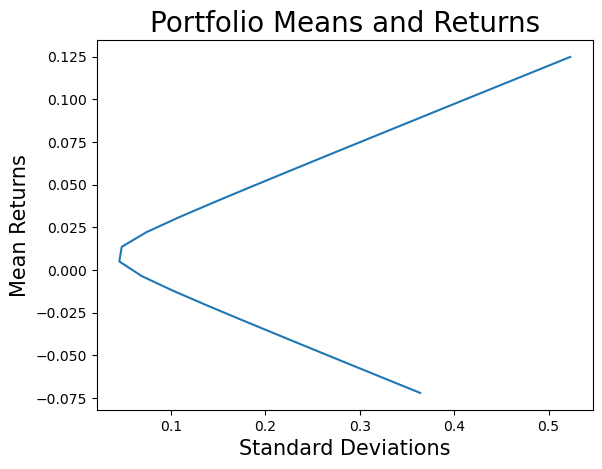

In [31]:
#Scatter Plot
plt.plot(port_z_sigma, port_z_ret) # envelope


# Titles and axes names
plt.title(r'Portfolio Means and Returns', fontsize = 20)
plt.xlabel(r'Standard Deviations', fontsize = 15)
plt.ylabel(r'Mean Returns', fontsize = 15)

# Show plot
plt.show()